University of Michigan - ROB 101 Computational Linear Algebra

# Max Margin Classifier

In [1]:
using Pkg
Pkg.add("OSQP")
Pkg.add("Compat")

    Updating registry at `C:\Users\maanigj\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
  No Changes to `C:\Users\maanigj\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\maanigj\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\maanigj\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\maanigj\.julia\environments\v1.6\Manifest.toml`


**Max Margin Classifier**

\begin{split}\begin{array}{ll}
  \mbox{minimize} & \frac{1}{2} w^\top w \\
  \mbox{subject to} & y_i (w^\top x_i) \geq 1 \qquad i = 1,\dots,n
\end{array}\end{split}

In [2]:
# generate a dataset
stop = false;
k1 = 0; # number of 1
k2 = 0; # number of -1
X = zeros(100,2); # input matrix
t = zeros(100,1); # target values
i = 1;
while !stop
    x = rand(1,2) * 5.;
    # separating line is x2 = 1.5 x1 + 0.4
    y = x[2] - 1.5 * x[1] - 0.4;
    # generate target values
    if (y > 0.02) && k1 < 50
        t[i] = 1;
        X[i,:] = x;
        k1 += 1;
        i += 1;
    elseif (y < -0.02) && k2 < 50
        t[i] = -1;
        X[i,:] = x;
        k2 += 1;
        i += 1;
    elseif k1 > 49 && k2 > 49
        break;
    end
end

# Class +1 IDs
class1_id = t .== 1;

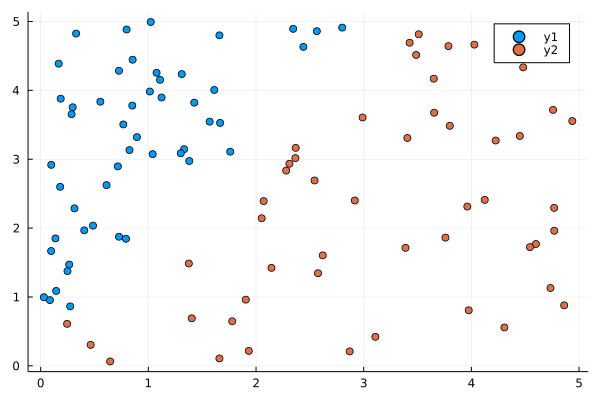

In [3]:
using Plots
gr() # Set the backend to GR

plot(X[class1_id[:],1], X[class1_id[:],2], seriestype = :scatter)
plot!(X[.!class1_id[:],1], X[.!class1_id[:],2], seriestype = :scatter)

In [4]:
using OSQP
using SparseArrays
using LinearAlgebra 

# Define problem data
P = sparse(zeros(3,3) + I);
q = zeros(3,1);
A = -sparse([t t t] .* [X ones(size(X,1),1)]);
l = zeros(size(X,1),1) .- Inf
u = -ones(size(X,1),1);

# Crate OSQP object
prob = OSQP.Model()

# Setup workspace and change alpha parameter
OSQP.setup!(prob; P=P, q=q[:], A=A, l=l[:], u=u[:])

# Solve problem
results = OSQP.solve!(prob);

println(results.x)

[-11.295244577918824, 8.763280524177635, -3.522853751654755]
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 3, constraints m = 100
          nnz(P) + nnz(A) = 303
settings: linear system solver = qdldl,
          eps_abs = 1.0e-003, eps_rel = 1.0e-003,
          eps_prim_inf = 1.0e-004, eps_dual_inf = 1.0e-004,
          rho = 1.00e-001 (adaptive),
          sigma = 1.00e-006, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter  objective    pri res    dua res    rho        time
   1  0.0000e+000  1.00e+000  4.60e+000  1.00e-001  9.47e-005s
 200  1.3211e+001  7.23e-001  2.28e-002  1.0

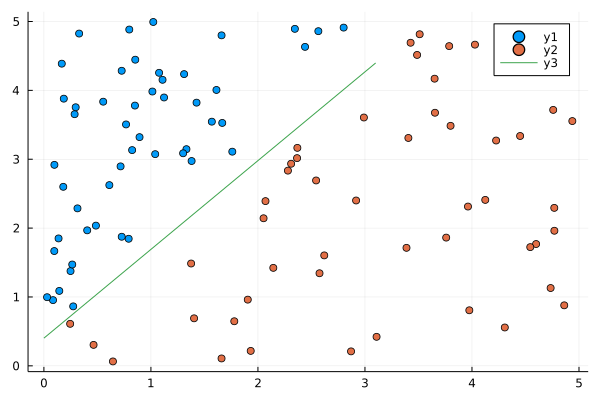

In [5]:
w_line = -results.x ./ results.x[2];

x_line = collect(0:0.1:3.1)
y_line = w_line[1] * x_line .+ w_line[3]
plot!(x_line, y_line)